In [5]:
!pip install pyspark

!pip install streamlit

!pip install bs4
!pip install rottentomatoes-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=79b0f517029a33325eff03a25ca03ed7dbee0829ffbef273690ec321bc1e2bb1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import rottentomatoes as rt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
import sqlite3
import pandas as pd
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

#WEB SCRAPING CODE

In [ ]:
genres = ['action','drama','adventure','anime','animation','comedy','documentary','sci_fi']

import requests
from bs4 import BeautifulSoup

def fetch_all_genres_movies():
  movie_list =[]
  # movie_details = []
  for each_genre in genres:

    # URL of the top 100 action & adventure movies on Rotten Tomatoes
    base_url = 'https://www.rottentomatoes.com/browse/movies_at_home/genres:'+ each_genre +'~sort:popular?page=5'

        # Send a GET request to the URL of the current page
    response = requests.get(f"{base_url}")

        # Parse the HTML content of the page with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    spans = soup.find_all('span', {'class': 'p--small', 'data-qa': 'discovery-media-list-item-title'})

    # movie_dict = []
    for span in range(len(spans)):
      # print(spans[span].text.strip())


            # Extract the movie titles from the span tags and add them to the list of all movies
      movie_title = spans[span].text.strip()
      movie_list.append(str(movie_title).lower())


  print(f'Total number of genres fetched: {len(final_list)}')
  print(movie_list)
  return list(set(movie_list))

In [ ]:
final_list = fetch_all_genres_movies()

Total number of genres fetched: 813
['damsel', 'dune', 'argylle', 'napoleon', 'the beekeeper', 'code 8: part ii', 'aquaman and the lost kingdom', 'rebel moon: part one - a child of fire', 'the iron claw', 'the marvels', 'the creator', 'the hunger games: the ballad of songbirds & snakes', 'the thundermans return', 'the killer', 'avatar: the way of water', 'interstellar', 'red right hand', 'sicario', 'mission: impossible - dead reckoning part one', 'spider-man: across the spider-verse', 'the batman', 'no way up', 'freelance', 'furies', 'avengers: endgame', 'indiana jones and the dial of destiny', 'the equalizer 3', 'lift', 'gran turismo: based on a true story', 'ready player one', 'bullet train', 'the dark knight', 'top gun: maverick', 'spider-man: no way home', "marvel's the avengers", 'pacific rim uprising', 'guardians of the galaxy vol. 3', 'john wick: chapter 4', 'i.s.s.', 'godzilla vs. kong', 'the legend of hercules', 'tenet', 'blue beetle', 'godzilla', 'prey', "guy ritchie's the co

In [ ]:
import time
def fetch_movie_additional_details(movies):
    add_details = {}
    for movie_name in movies:
        temp = {}
        time.sleep(10)

        try:
            temp["title"] = movie_name
            temp["tomatometer"] = rt.tomatometer(movie_name)
            temp["audience_score"] = rt.audience_score(movie_name)
            temp["rating"] = rt.rating(movie_name)
            temp["genres"] = rt.genres(movie_name)
            temp["actors"] = rt.actors(movie_name, max_actors=2)
            # Calculate the weighted score
            # print(rt.weighted_score(movie_name))  # Output: 69
        except Exception as e:
            # Handle the exception (e.g., movie details not found)
            print(f"Error fetching details for {movie_name}: {e}")
            continue  # Skip to the next movie

        add_details[movie_name] = temp

    return add_details


In [ ]:
master_movie_list = fetch_movie_additional_details(final_list)

Error fetching details for modest heroes: No movies found.
Error fetching details for runaway radio: No movies found.
Error fetching details for kids are growing up: a story about a kid named laroi: No movies found.
Error fetching details for to me, the one who loved you: No movies found.
Error fetching details for sacred soil: the piney woods school story: No movies found.
Error fetching details for pokémon: the arceus chronicles: No movies found.
Error fetching details for giannis: the marvelous journey: No movies found.
Error fetching details for to every you i've loved before: No movies found.
Error fetching details for the ballad of davy crockett: No movies found.
Error fetching details for wicked city: No movies found.
Error fetching details for pokémon the movie: secrets of the jungle: No movies found.
Error fetching details for my name is loh kiwan: No movies found.
Error fetching details for the troubles: a dublin story: No movies found.
Error fetching details for boruto: naru

In [ ]:
master_movie_list

{'the phantom': {'title': 'the phantom',
  'tomatometer': 86,
  'audience_score': 89,
  'rating': 'PG-13',
  'genres': ['Comedy', 'Drama'],
  'actors': ['Mark Rylance', 'Sally Hawkins']},
 'synchronic': {'title': 'synchronic',
  'tomatometer': 79,
  'audience_score': 76,
  'rating': 'R',
  'genres': ['Sci-Fi', 'Mystery & Thriller'],
  'actors': ['Anthony Mackie', 'Jamie Dornan']},
 'oppenheimer': {'title': 'oppenheimer',
  'tomatometer': 93,
  'audience_score': 91,
  'rating': 'R',
  'genres': ['Biography', 'History', 'Drama'],
  'actors': ['Cillian Murphy', 'Emily Blunt']},
 'my son': {'title': 'my son',
  'tomatometer': 67,
  'audience_score': 88,
  'rating': '',
  'genres': ['Biography', 'Comedy', 'Drama'],
  'actors': ['Laurence Fox', 'John James']},
 'voyagers': {'title': 'voyagers',
  'tomatometer': 25,
  'audience_score': 55,
  'rating': 'PG-13',
  'genres': ['Sci-Fi', 'Mystery & Thriller', 'Adventure'],
  'actors': ['Tye Sheridan', 'Lily-Rose Depp']},
 'the mother': {'title': '

In [ ]:
def create_df(schema):
  df = pd.DataFrame(schema)
  print(df)
  return df

In [ ]:
master_movies_df = create_df(master_movie_list)

                                  the phantom                      synchronic  \
title                             the phantom                      synchronic   
tomatometer                                86                              79   
audience_score                             89                              76   
rating                                  PG-13                               R   
genres                        [Comedy, Drama]    [Sci-Fi, Mystery & Thriller]   
actors          [Mark Rylance, Sally Hawkins]  [Anthony Mackie, Jamie Dornan]   

                                  oppenheimer                      my son  \
title                             oppenheimer                      my son   
tomatometer                                93                          67   
audience_score                             91                          88   
rating                                      R                               
genres            [Biography, History, Drama]  

In [ ]:
master_movies_df=master_movies_df.transpose()

In [ ]:
master_movies_df

,title,tomatometer,audience_score,rating,genres,actors
the phantom,the phantom,86,89,PG-13,"[Comedy, Drama]","[Mark Rylance, Sally Hawkins]"
synchronic,synchronic,79,76,R,"[Sci-Fi, Mystery & Thriller]","[Anthony Mackie, Jamie Dornan]"
oppenheimer,oppenheimer,93,91,R,"[Biography, History, Drama]","[Cillian Murphy, Emily Blunt]"
my son,my son,67,88,,"[Biography, Comedy, Drama]","[Laurence Fox, John James]"
voyagers,voyagers,25,55,PG-13,"[Sci-Fi, Mystery & Thriller, Adventure]","[Tye Sheridan, Lily-Rose Depp]"
...,...,...,...,...,...,...
the saint of second chances,the saint of second chances,100,96,,"[Drama, Biography, Documentary, Sports]","[Charlie Day, Mike Veeck]"
back to the future,back to the future,80,78,PG,"[Comedy, Sci-Fi, Western, Fantasy, Adventure]","[Michael J. Fox, Christopher Lloyd]"
the great debaters,the great debaters,80,86,PG-13,[Drama],"[Denzel Washington, Forest Whitaker]"
rise of the planet of the apes,rise of the planet of the apes,82,77,PG-13,"[Sci-Fi, Action, Adventure]","[James Franco, Freida Pinto]"


In [ ]:
#preprocessing
master_movies_df[['actor1', 'actor2']] = master_movies_df['actors'].apply(pd.Series)
master_movies_df[['genre1', 'genre2']] = master_movies_df['genres'].apply(lambda x: pd.Series(x[:2] if len(x) >= 2 else x + [np.nan]))
  # master_movies_df
master_movies_df.drop('genres', axis=1, inplace=True)

master_movies_df.drop('actors', axis=1, inplace=True)
master_movies_df.reset_index(drop=True, inplace=True)
# master_movies_df.rename(columns={'index': 'title'},inplace=True)
  # master_movies_df

master_movies_df.reset_index(inplace=True)
master_movies_df.rename(columns={'index': 'id'},inplace=True)
master_movies_df.fillna("NA")

,id,title,tomatometer,audience_score,rating,actor1,actor2,genre1,genre2
0,0,the phantom,86,89,PG-13,Mark Rylance,Sally Hawkins,Comedy,Drama
1,1,synchronic,79,76,R,Anthony Mackie,Jamie Dornan,Sci-Fi,Mystery & Thriller
2,2,oppenheimer,93,91,R,Cillian Murphy,Emily Blunt,Biography,History
3,3,my son,67,88,,Laurence Fox,John James,Biography,Comedy
4,4,voyagers,25,55,PG-13,Tye Sheridan,Lily-Rose Depp,Sci-Fi,Mystery & Thriller
...,...,...,...,...,...,...,...,...,...
762,762,the saint of second chances,100,96,,Charlie Day,Mike Veeck,Drama,Biography
763,763,back to the future,80,78,PG,Michael J. Fox,Christopher Lloyd,Comedy,Sci-Fi
764,764,the great debaters,80,86,PG-13,Denzel Washington,Forest Whitaker,Drama,NA
765,765,rise of the planet of the apes,82,77,PG-13,James Franco,Freida Pinto,Sci-Fi,Action


# SQL CODE

In [ ]:
def sql_db(df):
  conn = sqlite3.connect('movies.db')
  cursor = conn.cursor()
  df.to_sql('movies', conn, if_exists='append', index=False)

In [ ]:
sql_db(master_movies_df)

In [ ]:
query ='select * from movies'
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()
cursor.execute(query)
result = cursor.fetchall()
print(result)

[(0, 'the phantom', 86, 89, 'PG-13', 'Mark Rylance', 'Sally Hawkins', 'Comedy', 'Drama'), (1, 'synchronic', 79, 76, 'R', 'Anthony Mackie', 'Jamie Dornan', 'Sci-Fi', 'Mystery & Thriller'), (2, 'oppenheimer', 93, 91, 'R', 'Cillian Murphy', 'Emily Blunt', 'Biography', 'History'), (3, 'my son', 67, 88, '', 'Laurence Fox', 'John James', 'Biography', 'Comedy'), (4, 'voyagers', 25, 55, 'PG-13', 'Tye Sheridan', 'Lily-Rose Depp', 'Sci-Fi', 'Mystery & Thriller'), (5, 'the mother', 43, 62, 'R', 'Jennifer Lopez', 'Joseph Fiennes', 'Action', 'Mystery & Thriller'), (6, 'daniel', 43, 54, 'R', 'Timothy Hutton', 'Mandy Patinkin', 'Drama', None), (7, 'a haunting in venice', 76, 77, 'PG-13', 'Kenneth Branagh', 'Tina Fey', 'Holiday', 'Mystery & Thriller'), (8, 'the bricklayer', 50, 40, 'R', 'Aaron Eckhart', 'Nina Dobrev', 'Action', 'Mystery & Thriller'), (9, 'victim/suspect', 79, 75, 'R', 'Rae De Leon', 'Amanda Pike', 'Documentary', 'Crime'), (10, 'spirited away', 96, 96, 'PG', 'Daveigh Chase', 'Suzanne P

In [ ]:
# Visualization

def generate_plot():
    fig, ax = plt.subplots()
    for cluster in range(no_of_clusters):
        cluster_df = predictions.filter(predictions.prediction == cluster).toPandas()
        ax.scatter(cluster_df['tomatometer'], cluster_df['audience_score'], label=f'Cluster {cluster}', alpha=0.5)
    # ax.set_xlabel('Tomatometer')
    # ax.set_ylabel('Audience Score')
    ax.legend()
    plt.show()


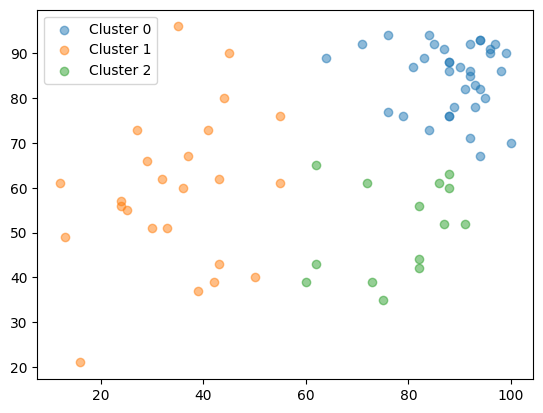

In [ ]:
generate_plot()

In [ ]:
# import streamlit as st
# import rottentomatoes as rt
# import numpy as np
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.clustering import KMeans
# import matplotlib.pyplot as plt
# from pyspark.sql.functions import col, when
# from pyspark.ml.feature import Imputer
# from pyspark.sql.types import StructType, StructField, StringType, IntegerType
# import sqlite3
# import pandas as pd
# from pyspark.ml.feature import StringIndexer
# from pyspark.ml.feature import OneHotEncoder

# import pyspark.sql.functions as F
# from pyspark.ml.evaluation import RegressionEvaluator


# from pyspark.ml import Pipeline
# from pyspark.ml.regression import RandomForestRegressor
# from pyspark.ml.feature import VectorIndexer


# ## CREATING A ML Model to predict best possible movies
# def final_ML_model(pandas_df):
#   pandas_df= temp

#   spark = SparkSession.builder.appName("MovieRecommender").getOrCreate()
#   data = spark.createDataFrame(pandas_df)

#   imputer = Imputer(strategy="mean", inputCols=["tomatometer", "audience_score"], outputCols=["tomatometer", "audience_score"])

#     # Convert string columns to numerical types
#   data = data.withColumn("tomatometer", col("tomatometer").cast("float"))
#   data = data.withColumn("audience_score", col("audience_score").cast("float"))
#   data = data.withColumn("rating", when(col("rating") != "", col("rating")).otherwise(None))


#   data = imputer.fit(data).transform(data)

#   str_obj=StringIndexer(inputCols=["genre1","genre2","actor1","actor2","rating"],outputCols=["new_genre1","new_genre2","new_actor1","new_actor2","new_rating"])

#   onehot_obj=OneHotEncoder(inputCols=["new_genre1","new_genre2","new_actor1","new_actor2","new_rating"],outputCols=["One_Hot_genre1","One_Hot_genre2","One_Hot_actor1","One_Hot_actor2","One_Hot_rating"])


#   data.printSchema()



#   data = str_obj.fit(data).transform(data)
#   data = onehot_obj.fit(data).transform(data)
#   data = data.withColumn("new_actor1", col("new_actor1").cast("integer"))
#   data = data.withColumn("new_actor2", col("new_actor2").cast("integer"))
#   data = data.withColumn("new_genre1", col("new_genre1").cast("integer"))
#   data = data.withColumn("new_genre2", col("new_genre2").cast("integer"))
#   data = data.withColumn("new_rating", col("new_rating").cast("integer"))
#   data = data.withColumn("tomatometer", col("tomatometer").cast("integer"))

# #   str_obj=StringIndexer(inputCols=["Actor1","Actor2","genre1","genre2"],outputCols=["new_actor1","new_actor2","new_genre1","new_genre2"])

# #   onehot_obj=OneHotEncoder(inputCols=["new_actor1","new_actor2","new_genre1","new_genre2"],outputCols=["one_hot_actor1","one_hot_actor2","one_hot_genre1","one_hot_genre2"])

# #   # data.printSchema()



#   assembler = VectorAssembler(inputCols=["tomatometer", "audience_score","One_Hot_genre1","One_Hot_genre2","One_Hot_actor1","One_Hot_actor2","One_Hot_rating"], outputCol="features")
#   assembledData = assembler.transform(data)

#   # ORIGINAL CODE


#   # Automatically identify categorical features, and index them.
#   # Set maxCategories so features with > 4 distinct values are treated as continuous.
#   featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)

#   # Split the data into training and test sets (30% held out for testing)
#   (trainingData, testData) = assembledData.randomSplit([0.7, 0.3])

#   # Train a RandomForest model.
#   rf = RandomForestRegressor(featuresCol="indexedFeatures", labelCol="id")

#   # Chain indexer and forest in a Pipeline
#   pipeline = Pipeline(stages=[featureIndexer, rf])

#   # Train model. This also runs the indexer.
#   model = pipeline.fit(trainingData)

#   # Make predictions.
#   predictions = model.transform(testData)

#   # Select example rows to display.
#   # predictions.select("prediction", "id", "features").orderBy('prediction', ascending =False).show(5)

#   # Select (prediction, true label) and compute test error
#   evaluator = RegressionEvaluator(labelCol="id", predictionCol="prediction", metricName="rmse")
#   rmse = evaluator.evaluate(predictions)
#   # print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

#   top_5_predictions = predictions.select("id").orderBy('prediction', ascending=False).limit(5).rdd.flatMap(lambda x: x).collect()

#   # top_5_predictions
#   # Assuming top_5_predictions is your list of top 5 ids
#   titles = data.filter(data.id.isin(top_5_predictions)).select('title').rdd.flatMap(lambda x: x).collect()

#   return titles


# MAIN work starts from here

In [6]:
!pip install pyspark

!pip install streamlit

!pip install bs4
!pip install rottentomatoes-python

In [3]:
%%writefile app.py

import streamlit as st
import rottentomatoes as rt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when
from pyspark.ml.feature import Imputer
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
import sqlite3
import pandas as pd
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

def get_df(movie_name,genre):

  # query ="select * from movies where genre1 IN "+ str(tuple(genre)) +" OR genre2 IN " +str(tuple(genre)) +"AND title!='"+movie_name +"'"
  formatted_genre = ','.join(["'" + item + "'" for item in genre])
  query = "SELECT * FROM movies WHERE (genre1 IN (" + formatted_genre + ") OR genre2 IN (" + formatted_genre + ")) AND title NOT LIKE '%" + movie_name + "%'"


  print(query)
  conn = sqlite3.connect('movies.db')
  cursor = conn.cursor()
  cursor.execute(query)
  result = cursor.fetchall()
  print(result)
  df = pd.DataFrame(result)
  # print(cursor.description)
  df.columns = [col[0] for col in cursor.description]
  return df
from pyspark.sql.functions import col, when

def clustering(pandas_df):


  spark = SparkSession.builder.appName("MovieRecommender").getOrCreate()
  df = spark.createDataFrame(pandas_df)

  imputer = Imputer(strategy="mean", inputCols=["tomatometer", "audience_score"], outputCols=["tomatometer", "audience_score"])

  # Convert string columns to numerical types
  df = df.withColumn("tomatometer", col("tomatometer").cast("float"))
  df = df.withColumn("audience_score", col("audience_score").cast("float"))
  df = df.withColumn("rating", when(col("rating") != "", col("rating")).otherwise("NA"))
  df = df.withColumn("genre2", when(col("genre2") != "", col("genre2")).otherwise("NA"))


  df = imputer.fit(df).transform(df)

  str_obj=StringIndexer(inputCols=["genre1","genre2","actor1","actor2","rating"],outputCols=["new_genre1","new_genre2","new_actor1","new_actor2","new_rating"])
  onehot_obj=OneHotEncoder(inputCols=["new_genre1","new_genre2","new_actor1","new_actor2","new_rating"],outputCols=["One_Hot_genre1","One_Hot_genre2","One_Hot_actor1","One_Hot_actor2","One_Hot_rating"])


  df = str_obj.fit(df).transform(df)
  df = onehot_obj.fit(df).transform(df)



  # Step 2: Feature Engineering
  feature_cols = ["tomatometer", "audience_score","One_Hot_genre1","One_Hot_genre2","One_Hot_actor1","One_Hot_actor2","One_Hot_rating"]
  assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
  newdata = assembler.transform(df)
  # Step 3: Model Training
  no_of_clusters = 3
  kmeans = KMeans(featuresCol="features").setK(no_of_clusters)
  predictions = kmeans.fit(newdata).transform(newdata)
  # predictions.show(10, truncate=False)

  #getting titles from each cluster
  cluster_titles={}
  for i in range(no_of_clusters):
      titles = predictions.filter(predictions.prediction == i).select("title").rdd.flatMap(lambda x: x).collect()[:5]
      #print(f"Set {i} length: {len(titles)}")
      # print(f"Cluster {i}: {titles}")
      cluster_titles['Set '+str(i+1)]=titles

  # print(cluster_titles)
  # titles.sear


  return cluster_titles

# MAIN WEB APP CODE

def fetch_rt_score(movie_title):
    try:
        my_dict={}
        my_dict["score"] = rt.tomatometer(movie_title)
        my_dict["actors"] = rt.actors(movie_title, max_actors=5)
        my_dict["audience_score"] = rt.audience_score(movie_title)
        my_dict["genres"] = rt.genres(movie_title)
        return my_dict
    except Exception as e:
        return f"Error fetching score for {movie_title}: {str(e)}"

def main():
    st.title("CinFind - Movie Recommeder")

    # Input field for movie name
    movie_name = st.text_input("Enter a movie name:", "Top Gun")

    # Fetch the score when the user clicks the button
    if st.button("Fetch Info"):
        info = fetch_rt_score(movie_name)
        score = info["score"]
        print(score)
        actors = info["actors"]
        genres = info['genres']
        df = get_df(str(movie_name).lower(),genres)
        titles = clustering(df)


        print(info)


        st.write(f"Rotten Tomatoes Score for '{movie_name}': {score}")
        st.write(f"Audience Rotten Tomatoes Score for '{movie_name}': {info['audience_score']}")
        st.write(f"Actors for {movie_name} : {actors}")
        st.write(f"Genre for {movie_name} : {genres}")
        st.write(f"Recommended Movies are : \n" )

        st.table(titles)


if __name__ == "__main__":
    main()


Writing app.py


In [1]:
# for running streamlit through localtunnel, we need to pass IPv4 or IPv6 address as password
!wget -q -O - https://loca.lt/mytunnelpassword

35.221.26.18

In [ ]:
# running streamlit through a defined port
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.26.18:8501

npx: installed 22 in 2.243s
your url is: https://giant-comics-follow.loca.lt
89
SELECT * FROM movies WHERE (genre1 IN ('Mystery & Thriller') OR genre2 IN ('Mystery & Thriller')) AND title NOT LIKE '%murder%'
[(1, 'synchronic', 79, 76, 'R', 'Anthony Mackie', 'Jamie Dornan', 'Sci-Fi', 'Mystery & Thriller'), (4, 'voyagers', 25, 55, 'PG-13', 'Tye Sheridan', 'Lily-Rose Depp', 'Sci-Fi', 'Mystery & Thriller'), (5, 'the mother', 43, 62, 'R', 'Jennifer Lopez', 'Joseph Fiennes', 'Action', 'Mystery & Thriller'), (7, 'a haunting in venice', 76, 77, 'PG-13', 'Kenneth Branagh', 'Tina Fey', 'Holiday', 'Mystery & Thriller'), (8, 'the bricklayer', 50, 40, 'R', 'Aaron Eckhart', 'Nina Dobrev', 'Action', 'Mystery & Thriller'), (31, 'inception', 87, 91, 'PG-13', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Sci-Fi', 'Mystery & Thriller'), (37, 'anatomy of a fall', 96, 